## **Instruksi**
Buatlah suatu contoh coding program menggunakan phyton untuk:
1. Kasus penggunaan JST dengan metode feed forward (FF)
2. Back Propagation (BP)

## **Penyelesaian**


### **Tahap 1: instalasi packages dan modul**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Tahap 2: Preparasi Data**

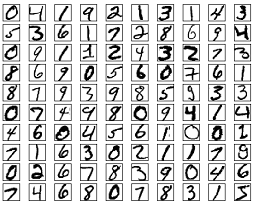

Data yang digunakan adalah MNIST dataset, yaitu sekumpulan angka digit 0-9 dalam bentuk tulisan tangan. Data tersebut diambil dari library **keras**.

In [ ]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Data tersebut berbentuk seperti berikut

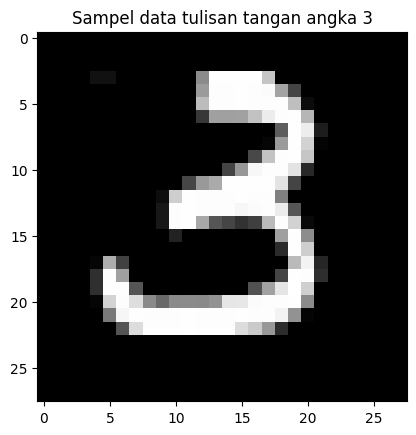

In [3]:
# mengatur setup IPython
%matplotlib inline

# memilih sampel secara acak, di sini dipilih data ke-11
sample = np.random.randint(0, len(X_train))
image = X_train[sample]
angka = Y_train[sample]

# menampilkan gambar
fig = plt.figure()
plt.imshow(image, cmap="gray")
plt.title("Sampel data tulisan tangan angka %d" %angka)
plt.show()

Seperti yang dapat dilihat dari gambar, dataset tersebut terdiri gambar 28x28 pixel. Selain itu, dataset memuat hingga 60 ribu data tulisan tangan

In [4]:
print("Size of X_train data:", X_train.shape)
print("Size of X_test data:", X_train.shape)

Size of X_train data: (60000, 28, 28)
Size of X_test data: (60000, 28, 28)


Sebab dataset terlalu banyak, maka kita akan mengambil 5000 sampel pertama

In [5]:
# number of sample
no_sample = 5000

# slicing the dataset
X_train = X_train[:no_sample]
Y_train = Y_train[:no_sample]

X_test = X_test[:no_sample]
Y_test = Y_test[:no_sample]

Setelah mengambil sebagian dataset, tahapan selanjutnya adalah membuat tiap data ke dalam bentuk array 1D, bukan 2D seperti yang ditunjukkan dari bentuk dataset (28, 28). Caranya adalah dengan menggunakan metode *.reshape()*. Selain itu, dataset akan dinormalisasi dengan membaginya terhadap angka 255 (nilai terbesar dari elemen data X)

In [6]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

Dapat dilihat bahwa ukuran dataset mengalami perubahan

In [7]:
print("Size of X_train data:", X_train.shape)
print("Size of X_test data:", X_train.shape)

Size of X_train data: (5000, 784)
Size of X_test data: (5000, 784)


Selanjutnya, kita perlu untuk membuat vektor dari tiap data target sebab algoritma ANN di bawah di-desain untuk bekerja dengan data numerik.

In [8]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Maksud dari membuat vektor adalah dengan mengubah data target, misalnya 1, menjadi ke dalam array 1D dengan 10 node, dengan elemen data ke-2 akan bernilai 1 sedangkan sisanya bernilai nol seperti berikut
- Data awal: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- Hasil vektorisasi: 1

### **Tahap 3: Membuat *neural network***

*Artificial neural network* yang dibangun akan terdiri dari 1 *input layer*, 1 *hidden layer*, dan *1 output layer*, seperti pada gambar berikut

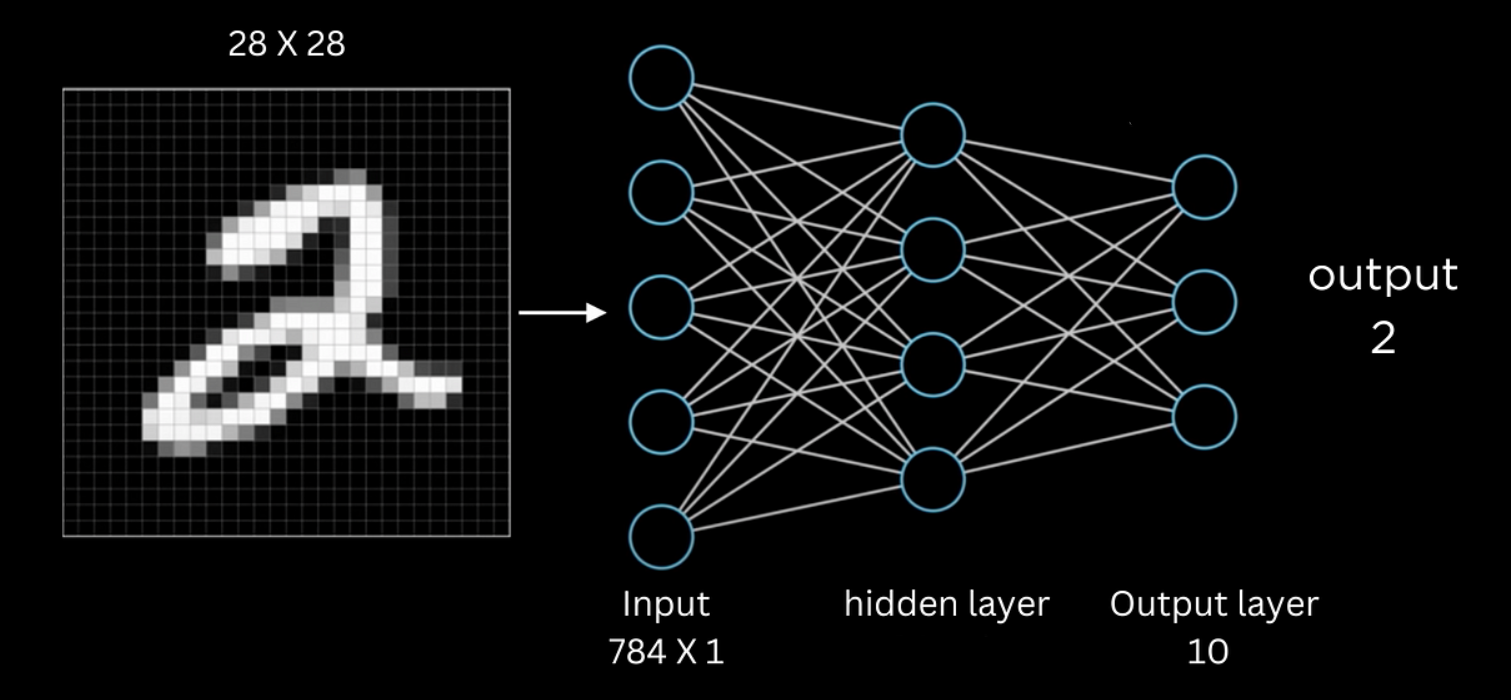

Program akan memanfaatkan konsep *feed forward*, *backpropagation* dan *gradient descent* untuk memprediksi data dengan tepat.

#### **Tahap 3.1: Inisialisasi class dan variabel**
Metode __init__ digunakan untuk menginisialisasi beberapa variabel dalam class `NN`, seperti lapisan-lapisannya, *learning rate*, serta *weights* dan *bias*

In [ ]:
def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate, epochs):
    
    # initializing the instance variables
    self.input_neurons = input_neurons 
    self.hidden_neurons = hidden_neurons
    self.output_neurons = output_neurons
    self.epochs = epochs
    
    # Links of weights from input layer to hidden layer
    self.wih = np.random.normal(0.0, pow(self.input_neurons, -0.5), (self.hidden_neurons, self.input_neurons))
    self.bih = 0
    
    # Links of weights from hidden layer to output layer
    self.who = np.random.normal(0.0, pow(self.hidden_neurons, -0.5), (self.output_neurons, self.hidden_neurons))
    self.bho = 0

    self.lr = learning_rate # Learning rate

#### **Tahap 3.2: Inisialisasi *activation function***
Selanjutnya adalah membuat fungsi aktivasi dalam program. Fungsi yang digunakan adalah fungsi sigmoid
$$ \sigma(x) = \frac{1}{1+e^{-x}} $$
Selain itu dibuat juga turunan dari fungsi tersebut
$$ \sigma'(x) = \sigma(x) (1-\sigma(x)) $$

In [ ]:
def activation(self, z):
    """Returns the sigmoid of z"""
    z = np.clip(z, -500, 500) # Avoid overflow error
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(self, z):
    """Returns the derivative of the sigmoid of z"""
    return self.activation(z) * (1 - self.activation(z))

#### **Tahap 3.3: Inisialisasi metode *feed forward***
Setelah fungsi aktivasi dibuat, langkah selanjutnya adalah mengimplementasikan konsep *feed forward*. 

In [ ]:
# Forward propagation
def feed_forward(self, input_list):
    inputs = np.array(input_list, ndmin=2).T
    
    # Passing inputs to the hidden layer
    hidden_inputs = np.dot(self.wih, inputs) + self.bih 

    # Getting outputs from the hidden layer
    hidden_outputs = self.activation(hidden_inputs)

    # Passing inputs from the hidden layer to the output layer 
    final_inputs = np.dot(self.who, hidden_outputs) + self.bho

    # Getting output from the output layer
    yj = self.activation(final_inputs)       
    
    return yj

$$
\begin{pmatrix}
h_{1} \\ h_{2} \\ h_{3}
\end{pmatrix}
=
\begin{pmatrix} 
w_{11} & w_{12} & w_{13} \\ 
w_{21} & w_{22} & w_{23} \\ 
w_{31} & w_{32} & w_{33} \\ 
\end{pmatrix}
\begin{pmatrix}
x_{1} \\ x_{2} \\ x_{3}
\end{pmatrix}
+
\begin{pmatrix}
b_{1} \\ b_{2} \\ b_{3}
\end{pmatrix}
=
\begin{pmatrix}
w_{11}*x_{1} + w_{12}*x_{12} + w_{13}*x_{3} + b_{1} \\ 
w_{21}*x_{1} + w_{22}*x_{2} + w_{23}*x_{3} + b_{2} \\ 
w_{31}*x_{1} + w_{32}*x_{2} + w_{33}*x_{3} + b_{3} \\ 
\end{pmatrix}
$$

$$ h_{j}^{l+1} = \sigma(w_{ij}^{l}*x_{j}^{l} + b_{j}^{l}) $$ 

#### **Tahap 3.4: Inisialisasi metode *back propagation* dan *gradient descent***
Untuk dapat melatih ANN yang telah dibuat dengan dataset MNIST, maka digunakan *back propagation*, yaitu mengatur *weights* dan *bias* yang telah diatur sebelumnya dengan cara menyebarkan eror yang didapat pada *output layer* kembali ke *hidden layer* hingga ke *input layer*. Metode *back propagation* digunakan dengan menghitung *gradient descent*, yaitu pengaruh tiap node yang memberikan penurunan tercepat terhadap *cost function* dari ANN tersebut. Hal ini diperlukan sebab kita ingin memiliki *neural network* dengan *cost** yang minimum. 

**Cost* adalah rata-rata kuadrat perbedaan error hasil *training data* terhadap data sebenarnya. 

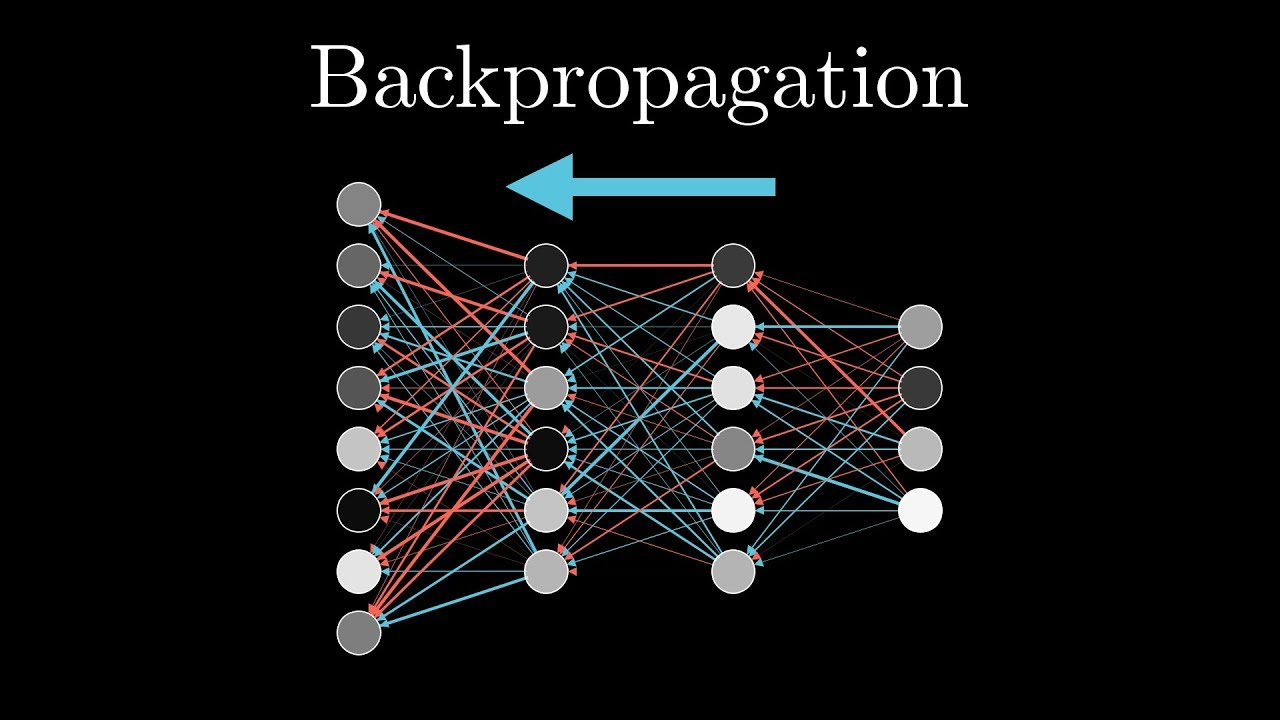

In [ ]:
# Back propagation
def backprop(self, inputs_list, targets_list):
    
    inputs = np.array(inputs_list, ndmin=2).T
        
    tj = np.array(targets_list, ndmin=2).T # Targets
    # passing inputs to the hidden layer
    hidden_inputs = np.dot(self.wih, inputs) + self.bih

    # Getting outputs from the hidden layer
    hidden_outputs = self.activation(hidden_inputs)
    
    # Passing inputs from the hidden layer to the output layer
    final_inputs = np.dot(self.who, hidden_outputs) + self.bho
    
    # Getting output from the output layer
    yj = self.activation(final_inputs)
    
    # Finding the errors from the output layer
    output_errors = -(tj - yj)
    
    # Finding the error in the hidden layer
    hidden_errors = np.dot(self.who.T, output_errors)

    # Updating the weights using Gradient Descent Update Rule
    self.who -= self.lr * np.dot((output_errors * self.sigmoid_derivative(yj)), np.transpose(hidden_outputs))
    self.wih -= self.lr * np.dot((hidden_errors * self.sigmoid_derivative(hidden_outputs)), np.transpose(inputs))

    #updating bias
    self.bho -= self.lr * (output_errors * self.sigmoid_derivative(yj))
    self.bih -= self.lr * (hidden_errors * self.sigmoid_derivative(hidden_outputs))
    pass

Metode tersebut akan menghasilkan *weights* dan *bias* yang telah diperbaharui untuk dapat digunakan dalam menguji *neural network*.

#### **Tahap 3.5: Inisialisasi metode *fit***
Metode ini digunakan untuk melatih *neural network* pada rentang iterasi (*epoch*)

In [ ]:
# Performing Gradient Descent Optimization using Backpropagation
def fit(self, inputs_list, targets_list):
    for epoch in range(self.epochs):         
        self.backprop(inputs_list, targets_list)
        print(f"Epoch {epoch}/{self.epochs} completed.")

#### **Tahap 3.6: Inisialisasi metode *predict***
Metode ini digunakan untuk melakukan prediksi terhadap data test dengan nilai *weights* dan *bias* yang telah diperbaharui.

In [ ]:
def predict(self, X):
    outputs = self.forward(X).T
    return outputs

Secara lengkapnya, kode class **NN** adalah sebagai berikut

In [15]:
class NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate, epochs):
        
        # initializing the instance variables
        self.input_neurons = input_neurons 
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.epochs = epochs
        
        # Links of weights from input layer to hidden layer
        self.wih = np.random.normal(0.0, pow(self.input_neurons, -0.5), (self.hidden_neurons, self.input_neurons))
        self.bih = 0
        
        # Links of weights from hidden layer to output layer
        self.who = np.random.normal(0.0, pow(self.hidden_neurons, -0.5), (self.output_neurons, self.hidden_neurons))
        self.bho = 0

        self.lr = learning_rate # Learning rate
        
    def activation(self, z):
        """Returns the sigmoid of z"""
        z = np.clip(z, -500, 500) # Avoid overflow error
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        """Returns the derivative of the sigmoid of z"""
        return self.activation(z) * (1 - self.activation(z))
    
    # Forward propagation
    def forward(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
        
        # Passing inputs to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs) + self.bih 

        # Getting outputs from the hidden layer
        hidden_outputs = self.activation(hidden_inputs)

        # Passing inputs from the hidden layer to the output layer 
        final_inputs = np.dot(self.who, hidden_outputs) + self.bho

        # Getting output from the output layer
        yj = self.activation(final_inputs)       
        
        return yj

    # Back propagation
    def backprop(self, inputs_list, targets_list):
        
        inputs = np.array(inputs_list, ndmin=2).T
            
        tj = np.array(targets_list, ndmin=2).T # Targets
        # passing inputs to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs) + self.bih

        # Getting outputs from the hidden layer
        hidden_outputs = self.activation(hidden_inputs)
        
        # Passing inputs from the hidden layer to the output layer
        final_inputs = np.dot(self.who, hidden_outputs) + self.bho
        
        # Getting output from the output layer
        yj = self.activation(final_inputs)
        
        # Finding the errors from the output layer
        output_errors = -(tj - yj)
        
        # Finding the error in the hidden layer
        hidden_errors = np.dot(self.who.T, output_errors)

        # Updating the weights using Update Rule
        self.who -= self.lr * np.dot((output_errors * self.sigmoid_derivative(yj)), np.transpose(hidden_outputs))
        self.wih -= self.lr * np.dot((hidden_errors * self.sigmoid_derivative(hidden_outputs)), np.transpose(inputs))

        #updating bias
        self.bho -= self.lr * (output_errors * self.sigmoid_derivative(yj))
        self.bih -= self.lr * (hidden_errors * self.sigmoid_derivative(hidden_outputs))
        pass

    # Performing Gradient Descent Optimization using Backpropagation
    def fit(self, inputs_list, targets_list):
        for epoch in range(self.epochs):         
            self.backprop(inputs_list, targets_list)
            if epoch%(self.epochs/10) == 0:
                print(f"Epoch {epoch}/{self.epochs} completed.")
            
    def predict(self, X):
        outputs = self.forward(X).T
        return outputs

### **Tahap 4: Melatih dan menguji *neural network***

#### **Tahap 4.1: Melatih *neural network***
Neural network yang dibuat terdiri dari 784 *input neurons* yang bersesuaian dengan jumlah data pixel, 128 *hidden neurons*, dan 10 *output neurons* yang bersesuaian dengan data, yakni ada 10 digit antara 0-9. Banyak iterasi (*epochs*) yang dilakukan adalah 1000. Pada tahap ini, awalnya adalah membuat instance class NN dengan parameter di atas, lalu memanggil metode *fit* untuk menerapkan proses *back propagation*

In [16]:
nn = NN(input_neurons=784, hidden_neurons=128, output_neurons=10, learning_rate=0.01, epochs=1000)
nn.fit(X_train, Y_train)

Epoch 0/1000 completed.
Epoch 100/1000 completed.
Epoch 200/1000 completed.
Epoch 300/1000 completed.
Epoch 400/1000 completed.
Epoch 500/1000 completed.
Epoch 600/1000 completed.
Epoch 700/1000 completed.
Epoch 800/1000 completed.
Epoch 900/1000 completed.


#### **Tahap 4.2: Menguji *neural network***
Pengujian *neural network* dilakukan dengan menerapkan metode *predict* dengan data X_test.

In [17]:
# Predicting probabiliies
probs = nn.predict(X_test)

# Converting probabilities to one-hot vector format
predictions = []

for prob in probs:
    max_idx = np.argmax(prob)
    prediction = np.zeros_like(prob)
    prediction[max_idx] = 1    
    predictions.append(prediction)

#### **Tahap 4.3: Mengevaluasi kinerja *neural network***
Untuk evaluasi kinerja *neural network* dapat menggunakan metode *accuracy_score* dan *classification_report* dari module **sklearn**

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy:",accuracy_score(predictions, Y_test))
print("CR:", classification_report(predictions, Y_test))

Accuracy: 0.7964
CR:               precision    recall  f1-score   support

           0       0.92      0.84      0.88       506
           1       0.97      0.92      0.94       599
           2       0.71      0.83      0.77       458
           3       0.78      0.79      0.78       492
           4       0.82      0.75      0.78       547
           5       0.64      0.65      0.64       453
           6       0.73      0.84      0.78       403
           7       0.80      0.88      0.84       466
           8       0.76      0.72      0.74       514
           9       0.80      0.74      0.77       562

   micro avg       0.80      0.80      0.80      5000
   macro avg       0.79      0.80      0.79      5000
weighted avg       0.80      0.80      0.80      5000
 samples avg       0.80      0.80      0.80      5000



Dapat dilihat bahwa precision dari *neural network* yang telah dibuat mencapai 80%, menunjukkan kinerja yang sangat bagus.

#### **Tahap 4.4: Melihat gambar dari hasil *neural network***


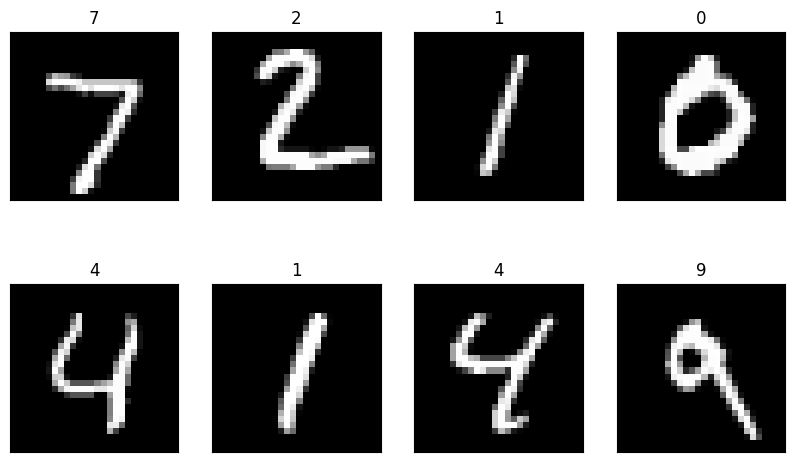

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    img_data = X_test[i].reshape((28, 28))
    # Display image
    ax.imshow(img_data, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    label = np.where(predictions[i] == 1)[0][0]
    true_label = np.argmax(Y_test[i])
    if label != true_label: # Writing the prediction label as red if it is wrong
        ax.set_title(label, color='r')
    else:
        ax.set_title(label)
plt.show()

Gambar angka digit di atas adalah datanya, sedangkan keterangan angka di atas tiap gambar menunjukkan apakah prediksinya sesuai dengan data:
- Jika berwarna hitam, maka sesuai
- Jika berwarna merah, maka hasil prediksi tidak sesuai dengan data